### Introduction

Tokenizers are one of the core components of the NLP pipeline. They serve one purpose: to translate text into data that can be processed by the model. Models can only process numbers, so tokenizers need to convert our text inputs to numerical data. In this section, we’ll explore exactly what happens in the tokenization pipeline. There are multiple kind of tokenizer -
- Word-based
- Character-based
- Subword-based
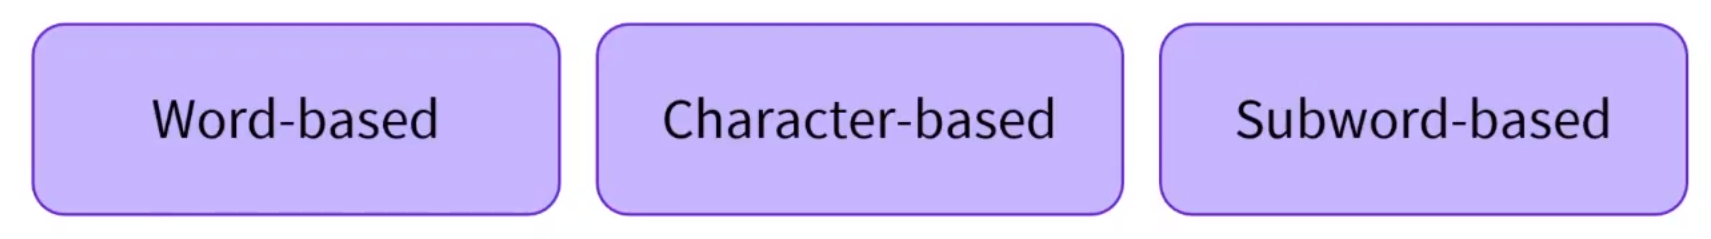

## Word-Based Tokenization

The first type of tokenizer that comes to mind is word-based. It’s generally very easy to set up and use with only a few rules, and it often yields decent results. For example, in the image below, the goal is to split the raw text into words and find a numerical representation for each of them:
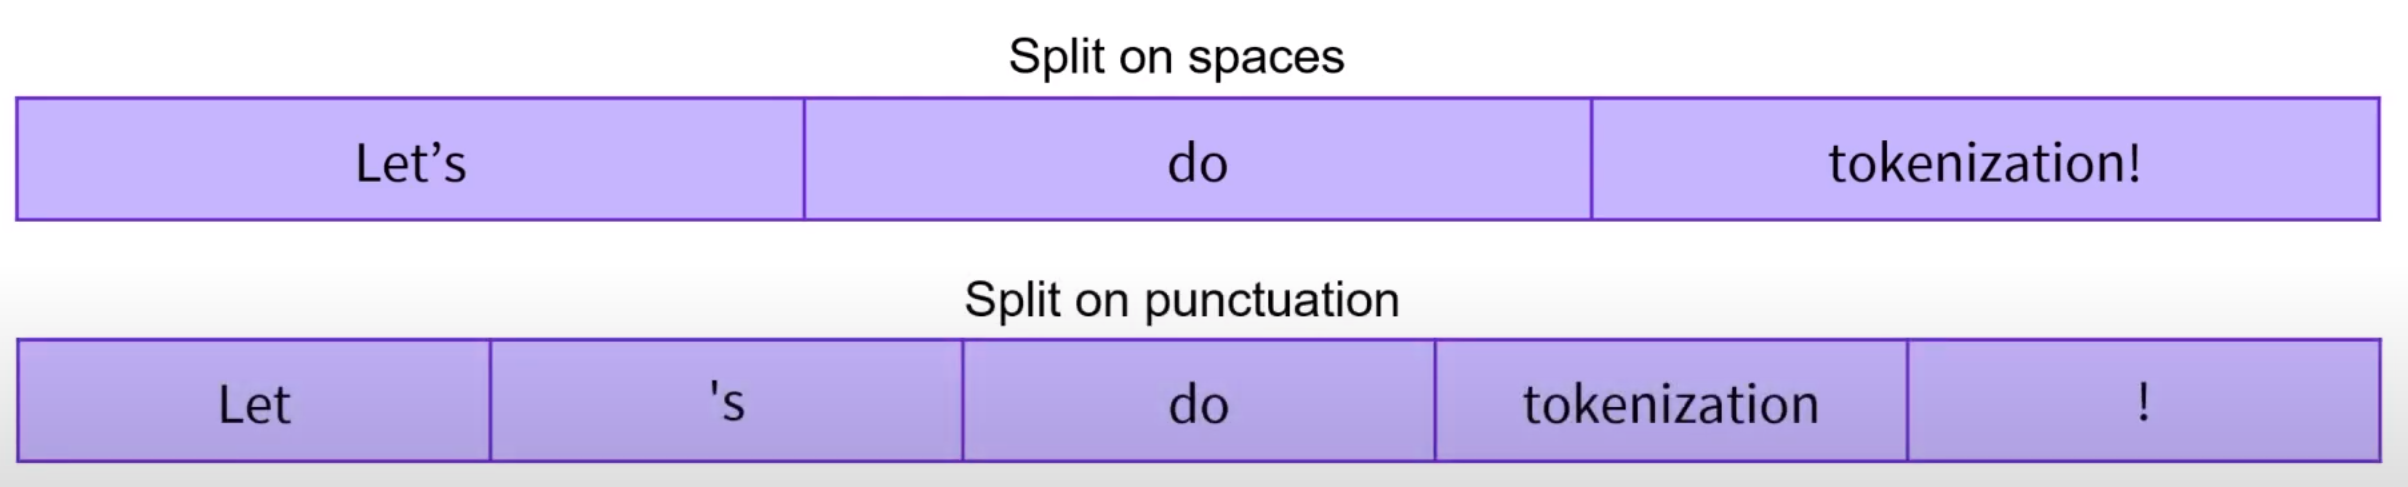

In [1]:
tokenized_text = "Jim Henson was a puppeteer".split()
print(tokenized_text)

['Jim', 'Henson', 'was', 'a', 'puppeteer']


Each word gets assigned an ID, starting from 0 and going up to the size of the vocabulary. The model uses these IDs to identify each word.

If we want to completely cover a language with a word-based tokenizer, we’ll need to have an identifier for each word in the language, which will generate a huge amount of tokens. For example, there are over 500,000 words in the English language, so to build a map from each word to an input ID we’d need to keep track of that many IDs. Furthermore, words like “dog” are represented differently from words like “dogs”, and the model will initially have no way of knowing that “dog” and “dogs” are similar: it will identify the two words as unrelated. The same applies to other similar words, like “run” and “running”, which the model will not see as being similar initially.

## Character-based tokenization

Character-based tokenizers split the text into characters, rather than words. This has two primary benefits:

- The vocabulary is much smaller.
- There are much fewer out-of-vocabulary (unknown) tokens, since every word can be built from characters.

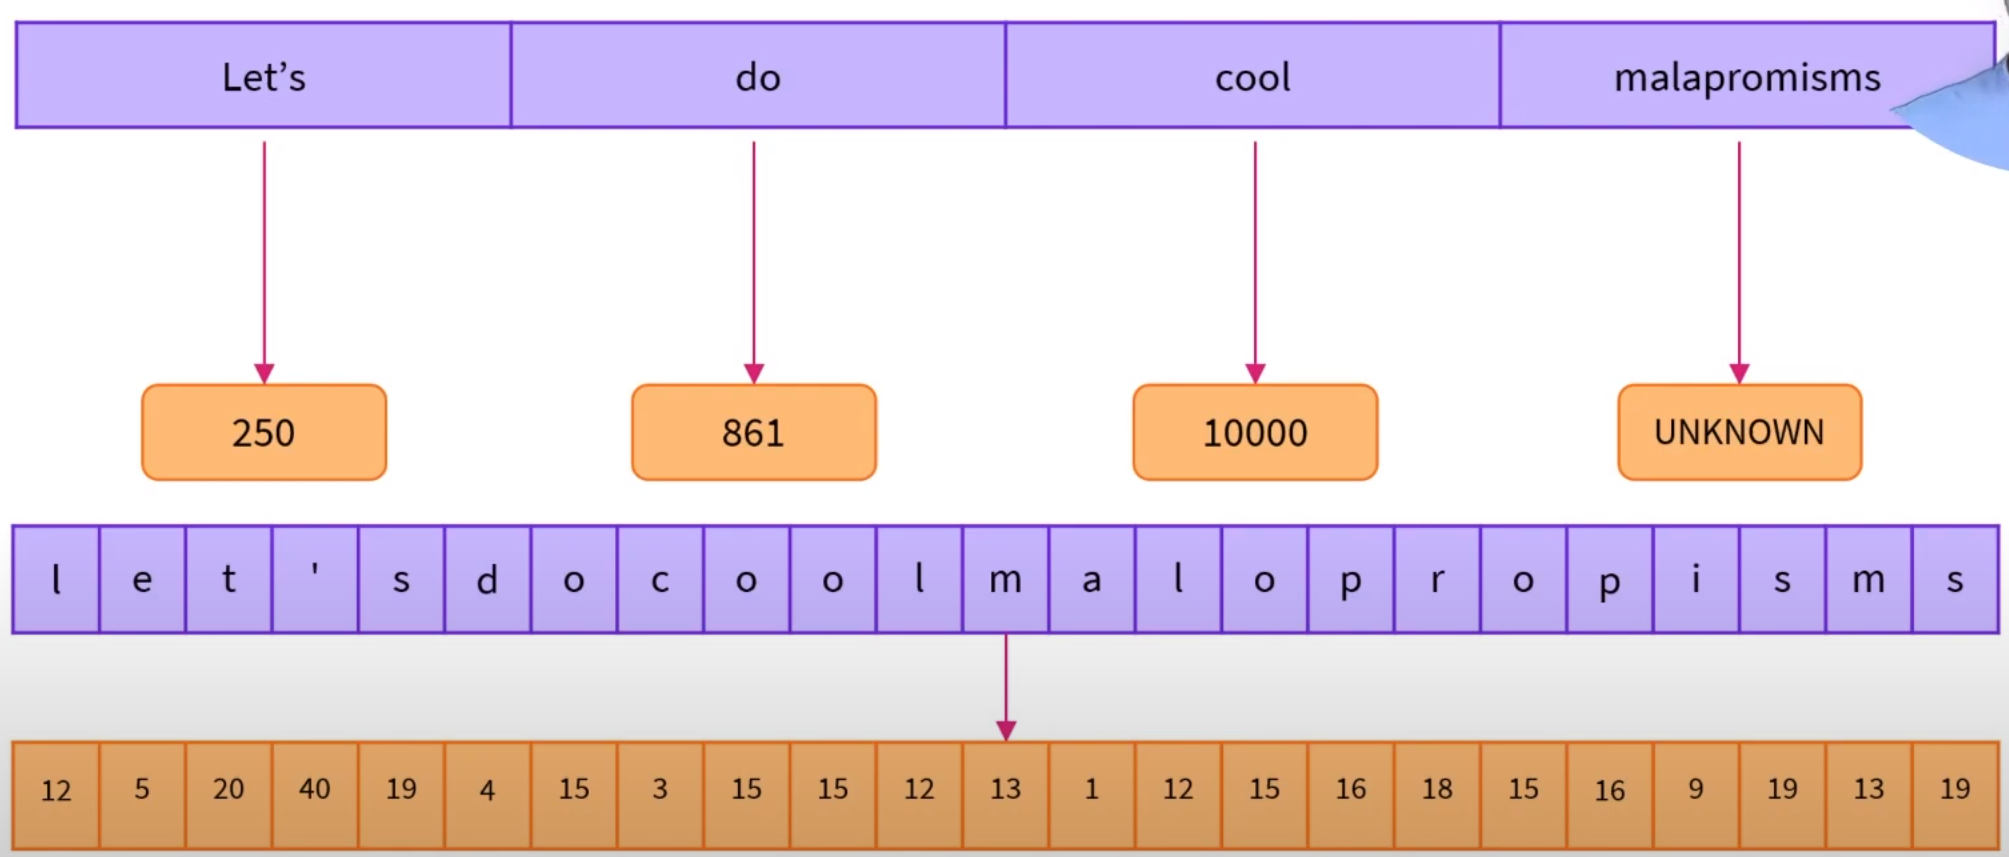

This approach isn’t perfect either. Since the representation is now based on characters rather than words, one could argue that, intuitively, it’s less meaningful: each character doesn’t mean a lot on its own, whereas that is the case with words. However, this again differs according to the language; in Chinese, for example, each character carries more information than a character in a Latin language.

Another thing to consider is that we’ll end up with a very large amount of tokens to be processed by our model: whereas a word would only be a single token with a word-based tokenizer, it can easily turn into 10 or more tokens when converted into characters.

## Subword-based Tokenizers

Subword tokenization algorithms rely on the principle that frequently used words should not be split into smaller subwords, but rare words should be decomposed into meaningful subwords.
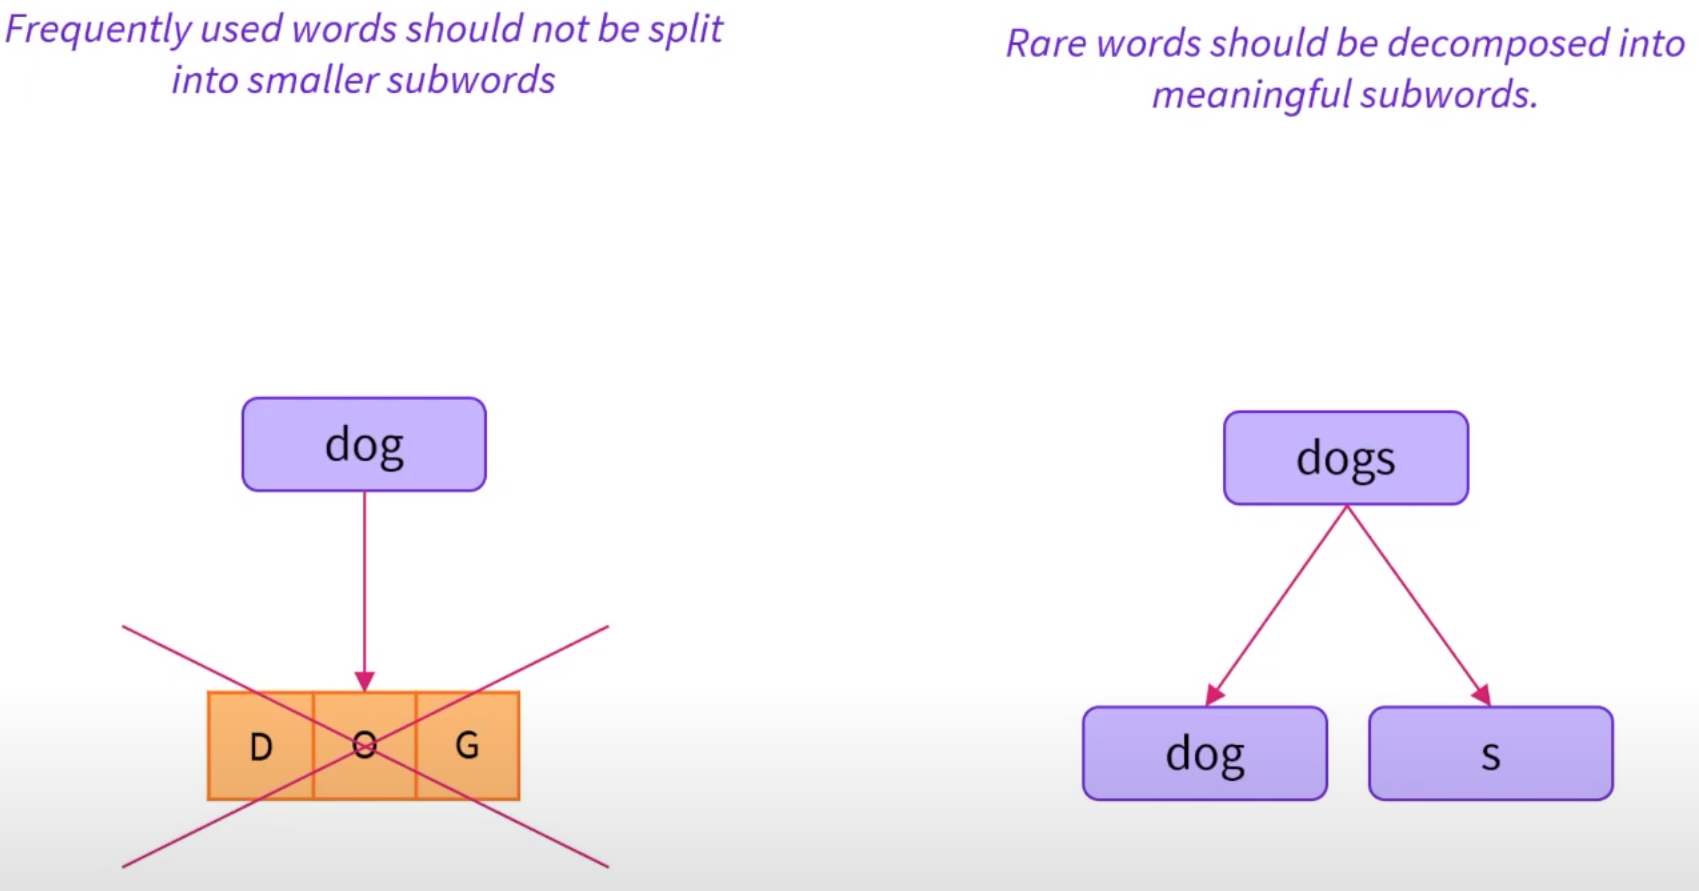

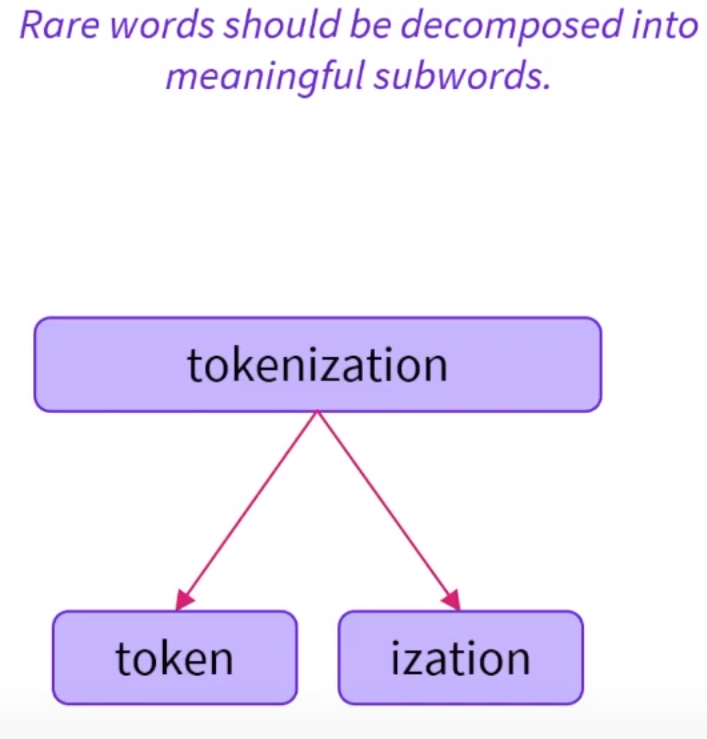

Here is an example showing how a subword tokenization algorithm would tokenize the sequence “Let’s do tokenization!“:
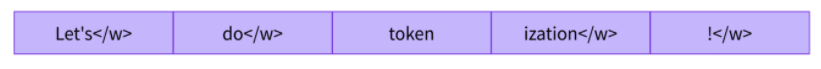

These subwords end up providing a lot of semantic meaning: for instance, in the example above “tokenization” was split into “token” and “ization”, two tokens that have a semantic meaning while being space-efficient (only two tokens are needed to represent a long word). This allows us to have relatively good coverage with small vocabularies, and close to no unknown tokens.

This approach is especially useful in agglutinative languages such as Turkish, where you can form (almost) arbitrarily long complex words by stringing together subwords.

## Loading and Saving Tokenizers

In [1]:
from transformers import BertTokenizer

In [2]:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

We can do the same thing using **AutoTokenizer**

In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

Usage of a tokenizer:

In [4]:
tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

We can save a tokenizer , same as model:

In [5]:
tokenizer.save_pretrained("my_tokenizer")

('my_tokenizer/tokenizer_config.json',
 'my_tokenizer/special_tokens_map.json',
 'my_tokenizer/vocab.txt',
 'my_tokenizer/added_tokens.json')

## Tokenizer Pipeline

Here is what happens in Tokenizer Pipeline -
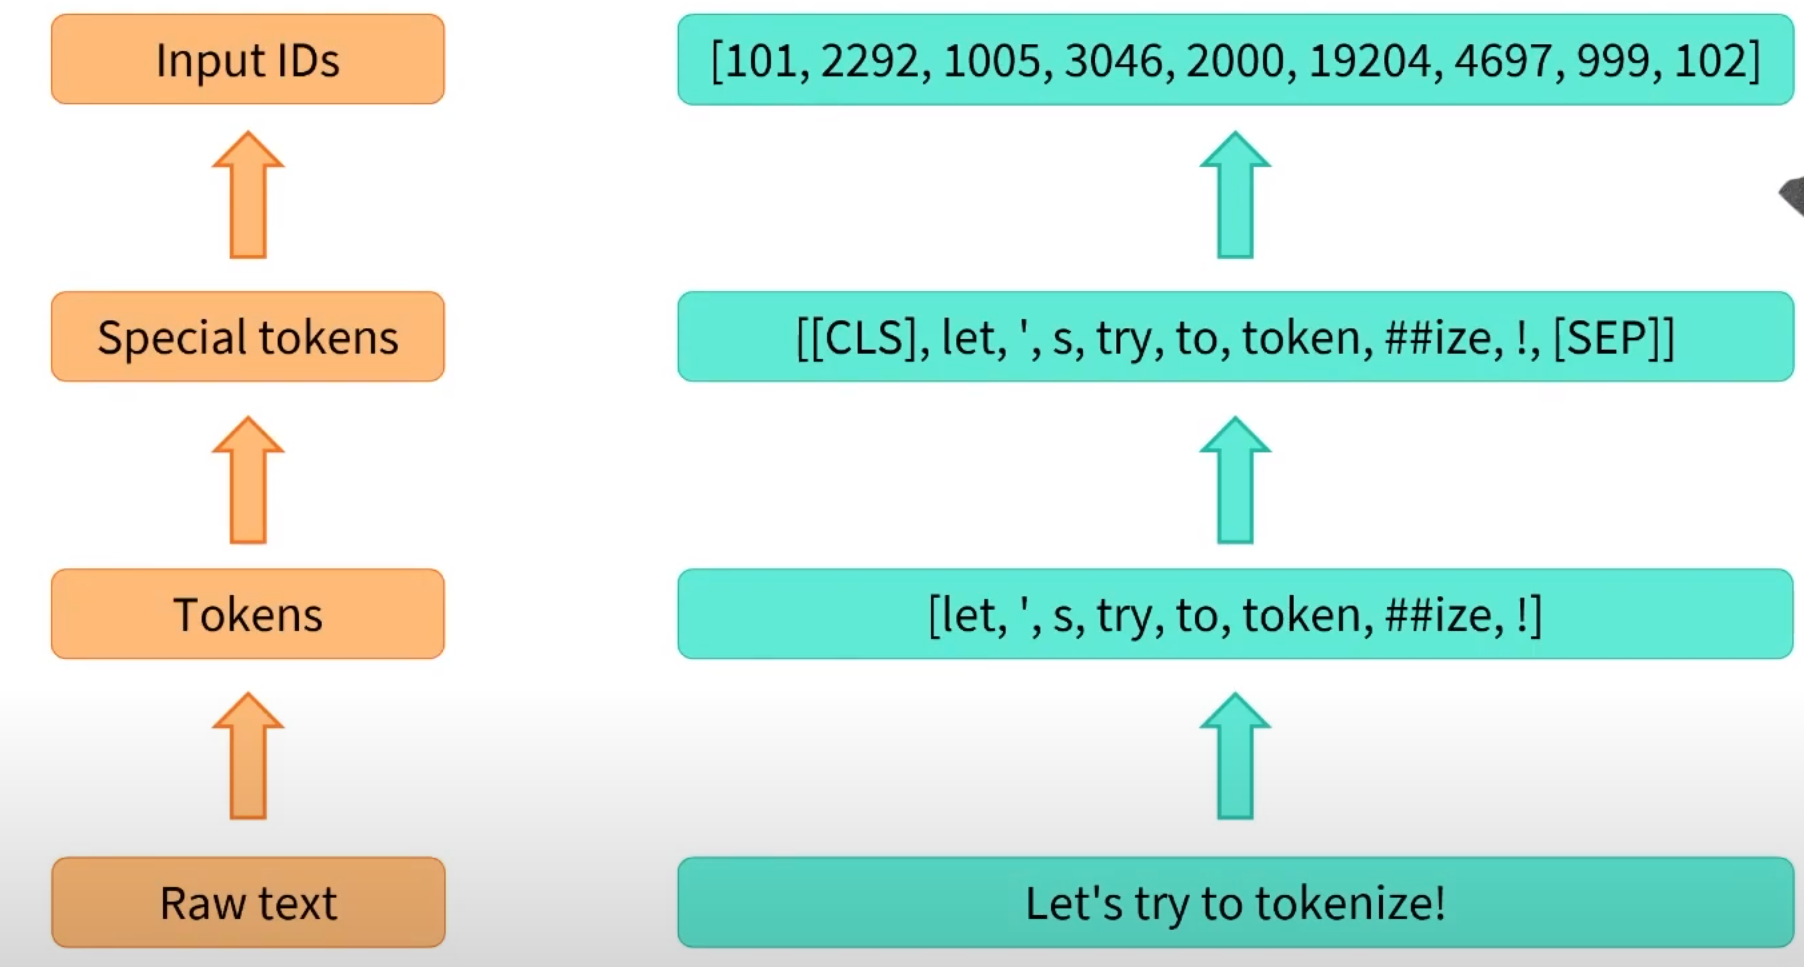

In [7]:
tokens = tokenizer.tokenize("Let's try totokenize!")
print(tokens)

['Let', "'", 's', 'try', 'to', '##tok', '##eni', '##ze', '!']


"## size" means that its not start of the word

In [8]:
input_ids = tokenizer.convert_tokens_to_ids(tokens)
print(input_ids)

[2421, 112, 188, 2222, 1106, 18290, 21462, 3171, 106]


In [9]:
final_inputs = tokenizer.prepare_for_model(input_ids)
print(final_inputs["input_ids"])

[101, 2421, 112, 188, 2222, 1106, 18290, 21462, 3171, 106, 102]


101 and 102 are special tokens added at the beginning and end of the token inputs

In [11]:
print(tokenizer.decode(final_inputs["input_ids"]))

[CLS] Let's try totokenize! [SEP]


Decoding is going the other way around: from vocabulary indices, we want to get a string. 